<a href="https://colab.research.google.com/github/DreamCookie/-/blob/main/MuseumDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git lfs clone https://github.com/metmuseum/openaccess

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
fatal: destination path 'openaccess' already exists and is not an empty directory.
Error(s) during clone:
git clone failed: exit status 128


In [2]:
# data analysis and math
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
met = pd.read_csv('openaccess/MetObjects.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
met.head(3)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [6]:
met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            477804 non-null  object 
 1   Is Highlight             477804 non-null  bool   
 2   Is Timeline Work         477804 non-null  bool   
 3   Is Public Domain         477804 non-null  bool   
 4   Object ID                477804 non-null  int64  
 5   Gallery Number           51776 non-null   object 
 6   Department               477804 non-null  object 
 7   AccessionYear            474248 non-null  object 
 8   Object Name              476113 non-null  object 
 9   Title                    448619 non-null  object 
 10  Culture                  207379 non-null  object 
 11  Period                   90956 non-null   object 
 12  Dynasty                  23233 non-null   object 
 13  Reign                    11226 non-null   object 
 14  Port

In [7]:
met.isnull().sum().sort_values(ascending=False)

Metadata Date              477804
River                      475709
State                      475254
Locus                      470311
County                     469354
Reign                      466578
Locale                     462095
Excavation                 461246
Subregion                  455680
Object Wikidata URL        455539
Dynasty                    454571
Portfolio                  454274
Rights and Reproduction    453606
Region                     446444
City                       445397
Gallery Number             426028
Geography Type             418035
Country                    402053
Period                     386848
Artist Gender              374743
Tags                       277404
Tags AAT URL               277404
Tags Wikidata URL          277404
Culture                    270425
Artist Wikidata URL        260072
Artist ULAN URL            255783
Artist Role                204368
Artist Display Bio         204368
Artist Suffix              202317
Artist End Dat

In [8]:
met.shape

(477804, 54)

In [9]:
def plot_pie_chart(values, labels, title):
  fig1, ax1 = plt.subplots()
  ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
  plt.title(title, size=14, pad=15)

  plt.show()

In [10]:
def plot_bar_chart(df, column, figsize=(10,5), title=None):
    counts = df[column].value_counts()[:10]
    plt.figure(figsize=figsize)
    sns.barplot(counts.values, counts.index)
    plt.xlabel('Number of artworks', size=14, labelpad=15)
    plt.xticks(rotation=0)
    plt.ylabel(column, size=14)
    plt.title(title, size=14, pad=15)
    plt.show()

In [11]:

no_nulls = set(met.columns[met.isnull().mean()==0])
len(no_nulls)
     

10

In [12]:
missing_cols = set(met.columns[met.isnull().mean() > 0.50])
print(len(missing_cols))
print(missing_cols)

26
{'River', 'Artist Gender', 'Artist Wikidata URL', 'Locale', 'State', 'Tags Wikidata URL', 'Subregion', 'Tags AAT URL', 'Artist ULAN URL', 'Region', 'City', 'Tags', 'Dynasty', 'Excavation', 'Locus', 'County', 'Period', 'Rights and Reproduction', 'Gallery Number', 'Object Wikidata URL', 'Reign', 'Culture', 'Geography Type', 'Portfolio', 'Metadata Date', 'Country'}


In [13]:
missing_cols = set(met.columns[met.isnull().mean() > 0.75])
print(len(missing_cols))
print(missing_cols)

20
{'River', 'Artist Gender', 'Locale', 'State', 'Subregion', 'Region', 'City', 'Dynasty', 'Excavation', 'Locus', 'County', 'Rights and Reproduction', 'Period', 'Gallery Number', 'Object Wikidata URL', 'Reign', 'Geography Type', 'Portfolio', 'Metadata Date', 'Country'}


In [14]:
for col in missing_cols:
  print(col)

River
Artist Gender
Locale
State
Subregion
Region
City
Dynasty
Excavation
Locus
County
Rights and Reproduction
Period
Gallery Number
Object Wikidata URL
Reign
Geography Type
Portfolio
Metadata Date
Country


In [16]:
met['Artist Nationality'].value_counts()[:10]

                     67789
American             46368
 |                   17287
French               16310
Italian              11681
French|French         8604
British               7673
German                6697
American|American     6512
Japanese              6015
Name: Artist Nationality, dtype: int64

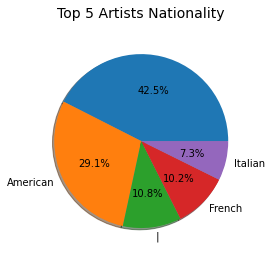

In [19]:
values = met['Artist Nationality'].value_counts()[:5].values
labels = met['Artist Nationality'].value_counts()[:5].index
plot_pie_chart(values, labels, "Top 5 Artists Nationality")

In [29]:
met['Artist Display Name'].describe()

count           275535
unique           64531
top       Walker Evans
freq              7505
Name: Artist Display Name, dtype: object

In [30]:
met['Artist Display Name'].value_counts()[:10]

Walker Evans                       7505
Kinney Brothers Tobacco Company    4163
Unknown                            3562
W. Duke, Sons & Co.                3088
Allen & Ginter                     2960
Brewster & Co.                     2757
Goodwin & Company                  2652
Topps Chewing Gum Company          2273
American Tobacco Company           2067
Exhibit Supply Company             1522
Name: Artist Display Name, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


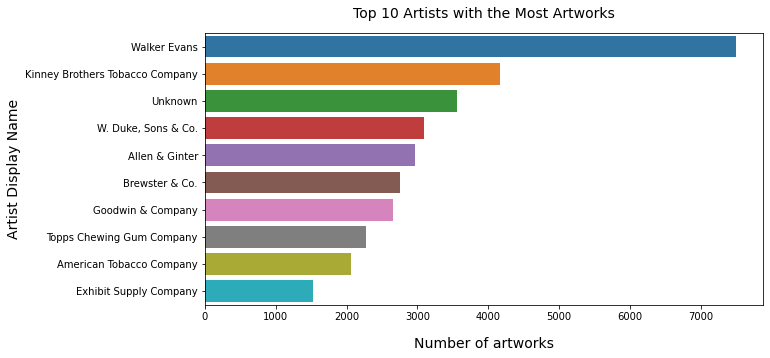

In [31]:
plot_bar_chart(met, column="Artist Display Name", title='Top 10 Artists with the Most Artworks')

In [33]:
met['Is Public Domain'].value_counts()

True     245307
False    232497
Name: Is Public Domain, dtype: int64

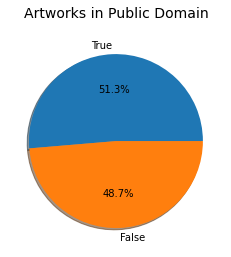

In [34]:
values = met['Is Public Domain'].value_counts()[:5].values
labels = met['Is Public Domain'].value_counts()[:5].index

plot_pie_chart(values, labels, "Artworks in Public Domain")

In [35]:
met['Medium'].value_counts()[:10]

Terracotta                     23532
Commercial color lithograph    17548
Etching                        16851
Engraving                      11433
Gelatin silver print           10340
Albumen photograph              9653
Silk                            8495
Bronze                          7217
Glass                           6523
Lithograph                      6500
Name: Medium, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


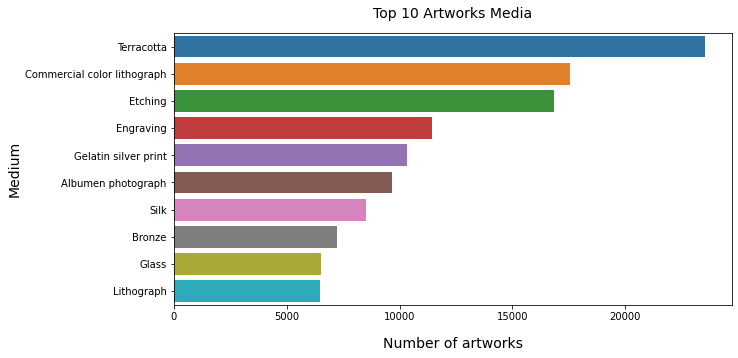

In [36]:
plot_bar_chart(met, column='Medium', title="Top 10 Artworks Media")

In [38]:
met['Department'].value_counts()

Drawings and Prints                          167152
European Sculpture and Decorative Arts        42934
Photographs                                   37192
Asian Art                                     36817
Greek and Roman Art                           33750
Costume Institute                             31412
Egyptian Art                                  27962
The American Wing                             18412
Islamic Art                                   15473
Modern and Contemporary Art                   14241
Arms and Armor                                13611
Arts of Africa, Oceania, and the Americas     12335
Medieval Art                                   7150
Ancient Near Eastern Art                       6222
Musical Instruments                            5210
European Paintings                             2617
Robert Lehman Collection                       2586
The Cloisters                                  2338
The Libraries                                   390
Name: Depart

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


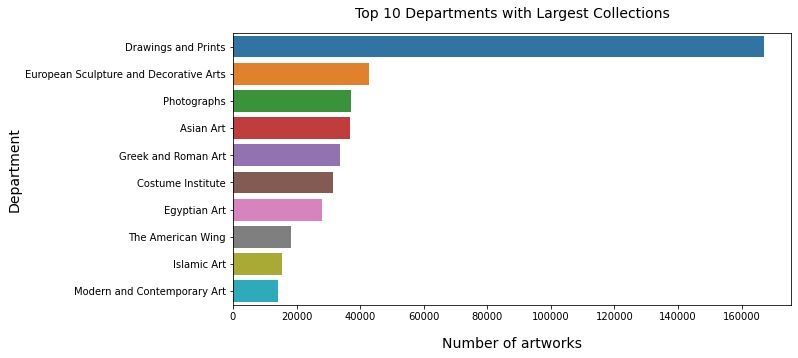

In [39]:
plot_bar_chart(met, column='Department', title="Top 10 Departments with Largest Collections")

In [40]:
met['Classification'].value_counts()[:10]

Prints                  80981
Prints|Ephemera         28388
Photographs             27091
Drawings                22717
Vases                   21315
Books                   14764
Ceramics                11059
Textiles-Woven          11000
Photographs|Ephemera    10018
Paintings                8624
Name: Classification, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


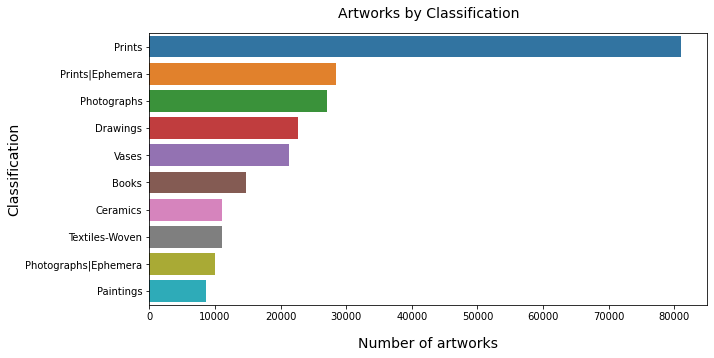

In [41]:
plot_bar_chart(met, column='Classification', title="Artworks by Classification")

In [42]:
met['Country'].value_counts()[:10]

Egypt              31318
United States       9107
Iran                6271
Peru                3396
France              1718
Byzantine Egypt     1673
Mexico              1540
Indonesia           1390
India               1377
England             1119
Name: Country, dtype: int64

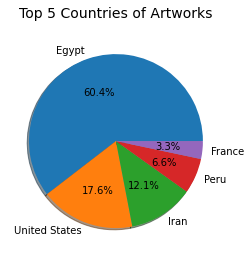

In [43]:
values = met['Country'].value_counts()[:5].values
labels = met['Country'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Countries of Artworks")

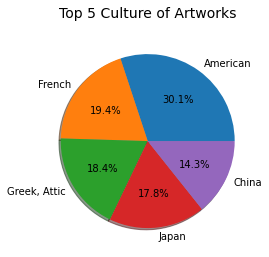

In [44]:
values = met['Culture'].value_counts()[:5].values
labels = met['Culture'].value_counts()[:5].index

plot_pie_chart(values, labels, "Top 5 Culture of Artworks")